# Name: - L PRATHYUSHA

# Reg no: - 19111344

# SECTION: - 4BBA - A

# END SEM (SECTION -  A and B)

# <Font size="5"><font color="red">ABC Company
a. Basic description of the data
1. loading and inspecting the data
2. data cleaning
    
b. Handling missing values.
3. data analysis (analysis of every plot and graph is explained properly)

c. Data Visualization on various features.
barplot, histogram, pairplot, displot, heatmap, boxplot, joint plot(hex,reg,kde), relplot, pointplot, countplot, stripplot

d. Splitting the data as test and train.

e.           Model
building. (Linear/Logistic Regression)

conclusion and learnings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg

from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob

# <font size="6"><font color=red> a. Basic description of the data

# <font size="5"><font color=red>Loading and inspecting the data

loading the csv data

A CSV file (Comma Separated Values file) is a type of plain text file that uses specific structuring to arrange tabular data.

pandas recognized that the first line of the CSV contained column names, and used them automatically.
pandas is also using zero-based integer indices in the DataFrame. That’s because we didn’t tell it what our index should be.

In [4]:
data=pd.read_csv('C:/Users/Prathyu Lachireddy/Desktop/ESE_2.csv - ESE_2.csv.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [5]:
# loading the head and tail data

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


# <font size="5">Data Cleaning

In [7]:
data.shape

(1000, 5)

In [8]:
len(data)

1000

In [9]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [10]:
#This shows the all the titles of the data since this is a huge data to deal with,
#this code will be really helpful to analyze later.
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

# <font size="6"><font color=red>b. Handling missing values

In [61]:
#isnull() function detect missing values in the given series object.
#It return a boolean same-sized object indicating if the values are NA.
#Missing values gets mapped to True and non-missing value gets mapped to False .

import numpy as np
data.isnull().sum()

#There are no missing values or any Null values in this data

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
#data.fillna(method='ffill')

null_values=data.fillna(np.mean(data))
null_values

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


# <font size="5">Basic analysis

In [14]:
#Smallest or minimum value of the column can be extracted though is code

data["Profit"].min()

14681.4

In [15]:
data['Profit'].max()

476485.43

In [16]:
# this shows the mean which is nothing but the average value of the data though out the whole data of 96453 rows.
# the result is saying that the average temperature in this area is 11 degrees.

mean1 = data['Profit'].mean()
mean1

119546.1646556102

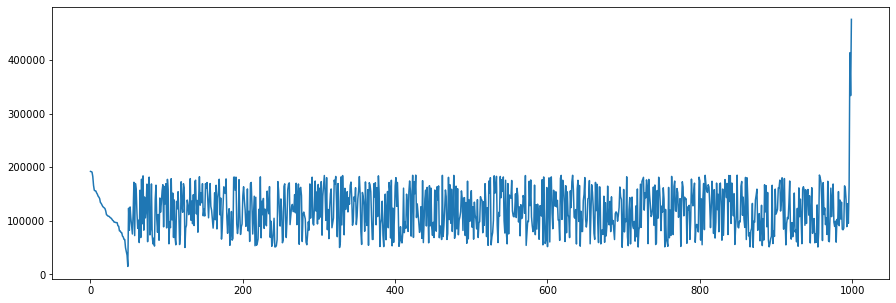

In [17]:
#the graph shows that variations in the data in the due course of time.

import matplotlib.pyplot as plt
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
data['Profit'].plot()
plt.show()

### Unique values

In [22]:
data[2:3]

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39


In [18]:
#nunique() function return number of unique elements in the object. 
#It returns a scalar value which is the count of all the unique values in the Index. 
data.nunique()

R&D Spend          997
Administration     998
Marketing Spend    996
State                3
Profit             998
dtype: int64

In [23]:
data['Profit'].nunique()

998

### Number of values in the data

In [25]:
# this shows the the number of numerical data is there under each of the categories in the summary column in the data.

#value_counts()
data.State.value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [27]:
#This code will display only the clear weather
#filtering
#data.head(2)
data[data.State == 'New York']

#or

#groupby()
#data.head(2)
data.groupby('State').get_group('New York')

#Here we are taking all the Clear weather data values from the summary in the weather data to check if there were any days.
# if there was clear weather for a person to go out.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.8000,471784.1000,New York,192261.83000
3,144372.41,118671.8500,383199.6200,New York,182901.99000
5,131876.90,99814.7100,362861.3600,New York,156991.12000
8,120542.52,148718.9500,311613.2900,New York,152211.77000
15,114523.61,122616.8400,261776.2300,New York,129917.04000
...,...,...,...,...,...
985,63615.00,119852.0486,191524.3554,New York,103378.64470
987,41289.00,116554.8432,148446.2774,New York,84305.73556
991,131106.00,129819.4269,321748.4242,New York,161035.62360
994,97209.00,124813.3635,256344.0701,New York,132077.70900


In [32]:
# we need to observe that in order to snow the data that is recorded should be more or less than the chosen value.
data[(data['State']=='New York') & (data['Profit'] > 150000)]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.8000,471784.1000,New York,192261.8300
3,144372.41,118671.8500,383199.6200,New York,182901.9900
5,131876.90,99814.7100,362861.3600,New York,156991.1200
8,120542.52,148718.9500,311613.2900,New York,152211.7700
65,126549.00,129146.4284,312955.6803,New York,157142.6178
...,...,...,...,...,...
947,131981.00,129948.6509,323436.7391,New York,161783.1286
957,159746.00,134049.1125,377009.3824,New York,185502.5285
959,144520.00,131800.4675,347630.7738,New York,172495.0881
991,131106.00,129819.4269,321748.4242,New York,161035.6236


# <font size="5"><font color=red>c. DATA VISUALISATION

In [37]:
D2=data[0:500]
D2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.8000,471784.1000,New York,192261.8300
1,162597.70,151377.5900,443898.5300,California,191792.0600
2,153441.51,101145.5500,407934.5400,Florida,191050.3900
3,144372.41,118671.8500,383199.6200,New York,182901.9900
4,142107.34,91391.7700,366168.4200,Florida,166187.9400
...,...,...,...,...,...
495,146341.00,132069.4011,351144.3983,New York,174050.7527
496,20181.00,113437.5176,107718.3338,California,66273.3533
497,105465.00,126032.6472,272274.0447,California,139130.7386
498,58528.00,119100.7772,181708.9750,Florida,99032.8645


BAR GRAPH

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

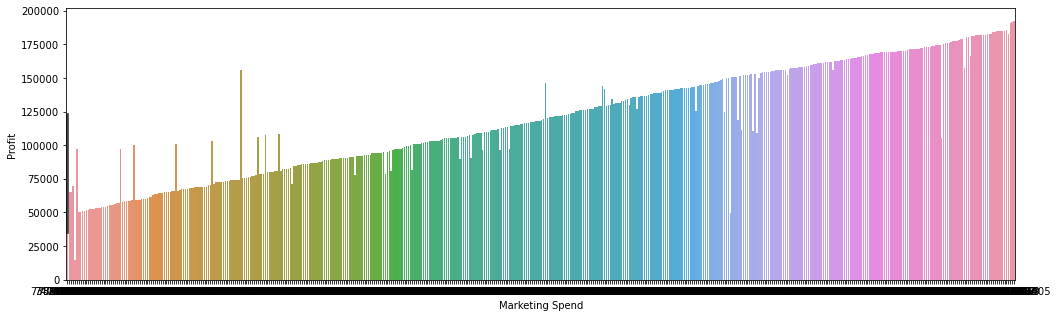

In [38]:
#the trend of the data shows that the data is increasing and the activities done by the ABC company are working
#the realtion between the marketing spend and as well as the profit is very high as there has been as good amount of profits 
#that are being caused by marketing like the highest is close to 200000 which is the maximum profit

fig_dims = (17, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(D2['Marketing Spend'],D2['Profit'])

HISTOGRAM

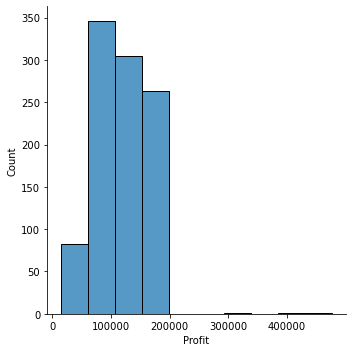

In [39]:
#distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. 
#distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data 
#i.e. data distribution of a variable against the density distribution.
#The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.
#the bin size shows the number of bars that are being ploted

sns.displot(data['Profit'],bins=10)

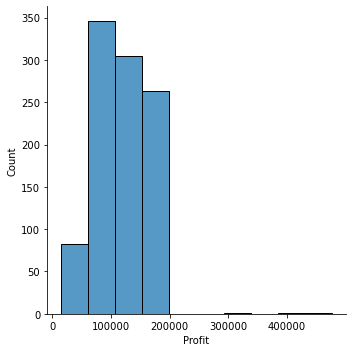

In [40]:
sns.displot(data['Profit'],bins=10)

### Heat map

In [41]:
correlation=data.corr()
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<AxesSubplot:>

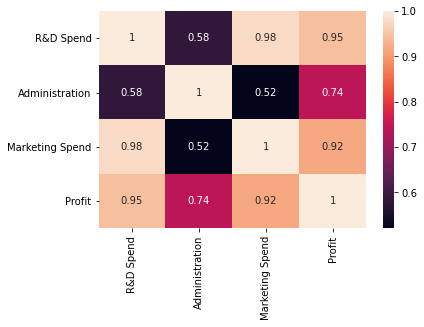

In [42]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

SEABORN PLOT

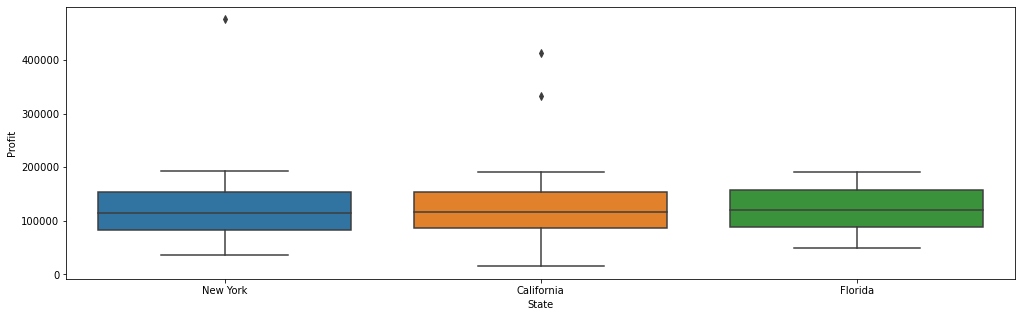

In [45]:
P=data.head(1000)
fig_dims = (17, 5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.boxplot(data=P, x='State',y='Profit')
plt.show()

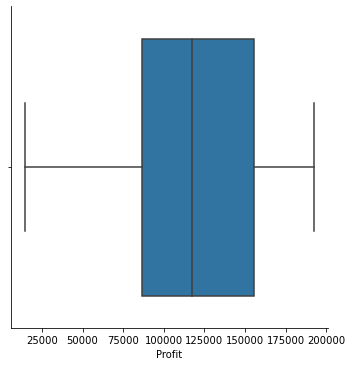

In [46]:
sns.catplot(x='Profit', kind='box',data=D2)

ANALYSIS for boxplot: - A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1) divided 25%, median, third quartile (Q3) upper 25% , and “maximum”). the box plot which is shown above depicts the temperature in the weather data and it is observed that the left line(wisker) shows the lower point which is between 0-5 and the median here is 15 degrees in temperature. Boxplots do really help us to understand the quartiles part of the data. the right wisker shows the highest temperature recorded which is 30 degrees. but the points which are places ouside the line are known as the outliers of the data where in this case the rare recorded temperatures in a particular geographic area.

<AxesSubplot:xlabel='Profit', ylabel='R&D Spend'>

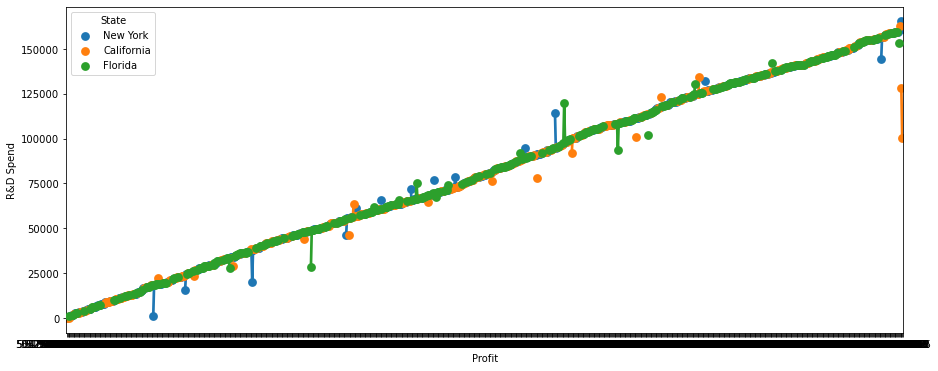

In [47]:

# ANALYSIS: - Variable 1: - humidity and variable 2: - temperature
# this graph shows the points of the two variables that are being chosen in different various weather conditions.

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(data['Profit'],data['R&D Spend'],hue=data['State'],ax=ax)

ANALYSIS: -the graphs depicts the graphical representation between aparent and temperature. This is a figure-level function for visualizing statistical relationships using two common approaches. Scatter Plots- Each plot point is an independent observation, every colour depicts a differernt weather condition in the Summary data.

here it could be observed that the relation between the R&D and the profit is good in Florida and the strength of is good in this city as in terms of profits due to the crowding of the data points.

PAIR PLOT

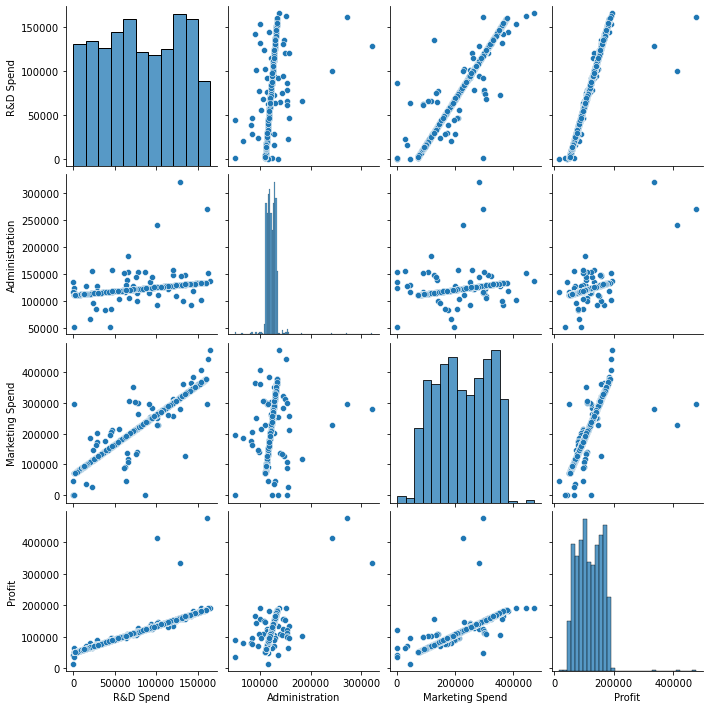

In [48]:
import seaborn as sns

sns.pairplot(data)

ANALYSIS: -

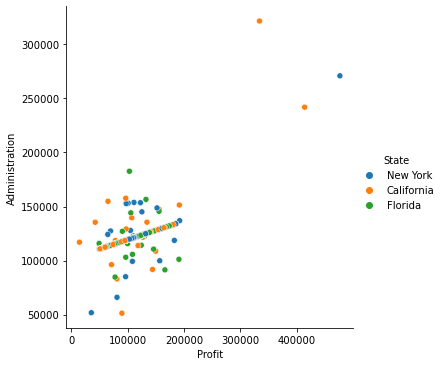

In [53]:
sns.relplot(x='Profit',y='Administration',hue='State',data=data)

ANALYSIS: - the graphs depicts the graphical representation between aparent and temperature. This is a figure-level function for visualizing statistical relationships using two common approaches. Scatter Plots- Each plot point is an independent observation, every colour depicts a differernt weather condition in the Summary data

COUNT PLOT

<AxesSubplot:xlabel='State', ylabel='count'>

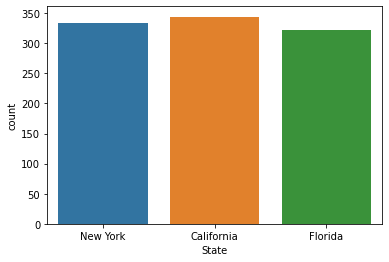

In [54]:
sns.countplot(data['State'])

ANALYSIS: - it Shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. here the values of each city in which the company is in is having it's profits coming from mostly from california as it is near to 350 and them followed by new york and florida

In [55]:
data[2:3]

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39


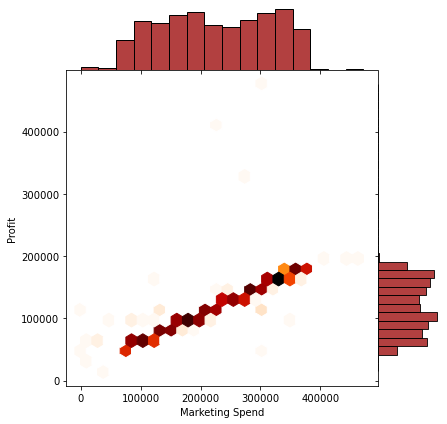

In [57]:
cmap=plt.cm.gist_heat_r
sns.jointplot(data['Marketing Spend'],data['Profit'],kind="hex",space=0, color=cmap(.6), cmap=cmap)

ANALYSIS: -

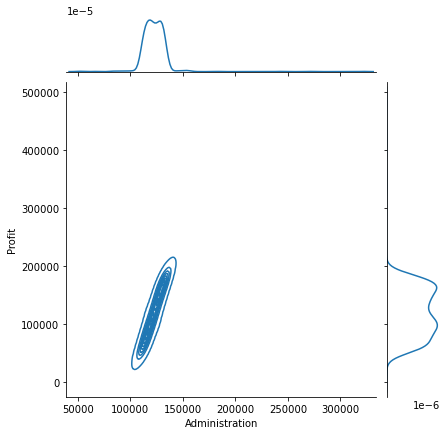

In [59]:
sns.jointplot(data['Administration'],data['Profit'],kind="kde")

In [64]:
DATA2=data[0:500]

<AxesSubplot:xlabel='Profit', ylabel='Marketing Spend'>

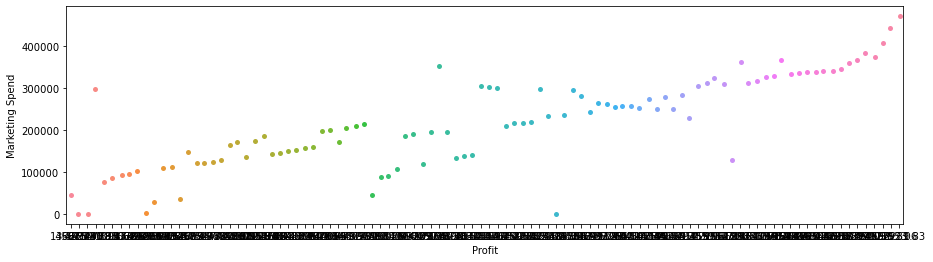

In [63]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(DATA2['Profit'],DATA2['Marketing Spend'])

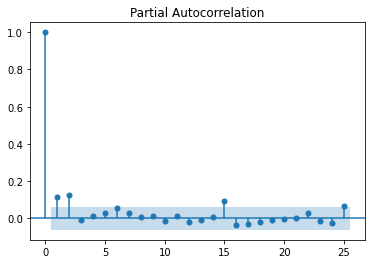

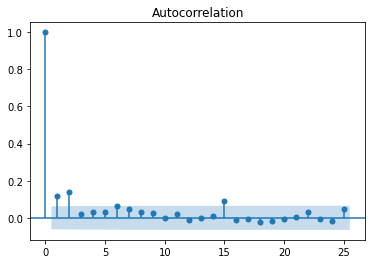

In [94]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(data['Profit'],lags=25)
acf=plot_acf(data['Profit'],lags=25)

#x- axis= time
#y- axis= Correlation
#higher the value the more the correlation in the data and the time.
#partial sees on the direct effect(previous and current time lag) and autocorrelation will see into indirect effects.

<AxesSubplot:>

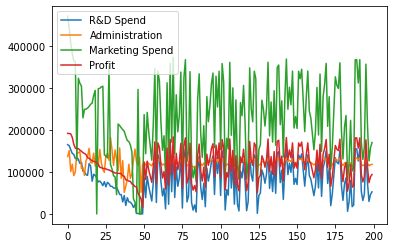

In [95]:
data[:200].plot()

#ANALYSIS: - it could be observed that the green lines on the graph is being concentrated by the "Marketing spend", 
#through this graph we can say that the most of the profits of the company are due to the expenditure done on the marketing
#it is a healthy sign


# <font size="6"> <font color= red> d. Splitting the data as test and train.

In [65]:
print(data.shape)
train=data.loc[:-10]
test=data.loc[-20:]

print(train.shape,test.shape)

(1000, 5)
(0, 5) (1000, 5)


In [68]:
stepwise_fit= auto_arima(data['Profit'],trace=True,
                        suppress_warnings=True)

stepwise_fit

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=24147.684, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24173.601, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24161.242, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24164.549, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26343.754, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=24147.197, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=24146.597, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=24147.879, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=24159.283, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=24148.930, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=25682.644, Time=0.13 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 3.356 seconds


ARIMA(order=(0, 0, 2), scoring_args={}, suppress_warnings=True)

Analysis of Auto Arima: - It takes into account the AIC and BIC values generated (as you can see in the code) to determine the best combination of parameters. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are estimators to compare models. The lower these values, the better is the model

In [76]:
data[0:1]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [77]:
X = data['R&D Spend']
y = data['Profit']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
# Let's now take a look at the train dataset

X_train.head()

420    125425.0
278     14349.0
218      6166.0
363     49407.0
850     46307.0
Name: R&D Spend, dtype: float64

In [80]:
y_train.head()

420    156182.39430
278     61291.12602
218     54300.45973
363     91240.87291
850     88592.56966
Name: Profit, dtype: float64

In [92]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [93]:
y_pred.head()

249     90437.164301
353    185419.793210
537    109402.979764
424     68618.798939
564     71662.630252
dtype: float64

<font size="6"> <font color=red> e. Model building. (Linear/Logistic Regression)

In [81]:
import statsmodels.api as sm

In [82]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [83]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const        48191.172300
R&D Spend        0.877438
dtype: float64

In [84]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     4256.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):          2.95e-299
Time:                        10:55:51   Log-Likelihood:                -7798.4
No. Observations:                 700   AIC:                         1.560e+04
Df Residuals:                     698   BIC:                         1.561e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.819e+04   1266.169     38.061      0.0

ANALYSIS: -
The values we are concerned with are -

1. The coefficients and significance (p-values)
2. R-squared

the coefficient value of R and D is statistically significant as there is low p value, R-squared is basically the difference between the square of the actual values and the predicted values, here the r squared is 0.85 which is close to 1 which is a good and a healthy sign.

Equation: -
SALES = 4.81 + 0.87 * R&D spend

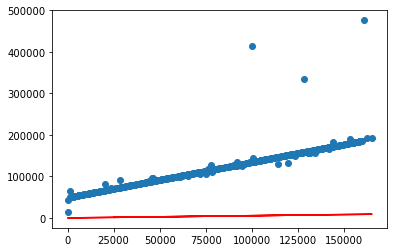

In [88]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [89]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

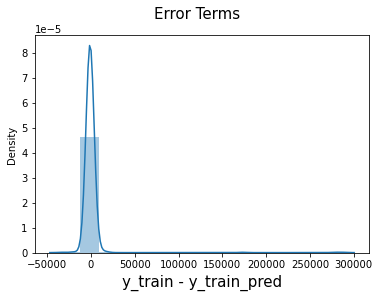

In [90]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

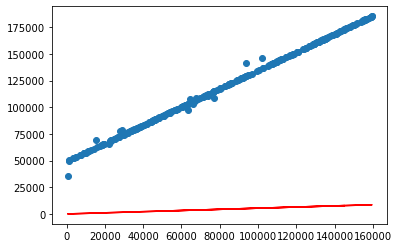

In [91]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [102]:
sarimax_model= SARIMAX(data['Profit'],order=(1,1,1),seasonal_order=(1,1,1,4),exog=data['Marketing Spend'])

In [103]:
res=sarimax_model.fit(disp=False)

In [104]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            Profit   No. Observations:                 1000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood              -10936.550
Date:                           Fri, 18 Jun 2021   AIC                          21885.100
Time:                                   11:26:40   BIC                          21914.517
Sample:                                        0   HQIC                         21896.283
                                          - 1000                                         
Covariance Type:                             opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Marketing Spend     0.4239      0.015     27.883      0.000       0.394       0.454
ar.L1              -0.4184      0.022    -18.695      0.000      -0.462      -0.375
ma.L1              -0.0564      0.025     -2.228      0.026      -0.106      -0.007
ar.S.L4             0.0247      0.030      0.833      0.405      -0.033       0.083
ma.S.L4            -0.9855      0.081    -12.187      0.000      -1.144      -0.827
sigma2           2.737e+08    9.9e-10   2.76e+17      0.000    2.74e+08    2.74e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2071184.51
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             9.36
Prob(H) (two-sided):                  0.56   Kurtosis:                       225.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.25e+31. Standard errors may be unstable.
"""

# <font size="5"> <font color= red> Conclusion and learnings

CONCLUSION: - In ABC Company, after few analysis and interpretations i could observe that the most of the profit made by the marketing activities of the company. There are spending their expenditure on the marketing activities and is helping them to do the promotional activities and leading them to generate profits.



Here, in this assignment i have included all the concepts of cleaning, panfas, using all the plots and with some research i have understood additional plots like jointplots and different categories among them. like: -

a. Give the basic description of the data.


b. Handling missing values.


c. Data Visualization on various features.


d. Splitting the data as test and train.


e.           Model
building. (Linear/Logistic Regression)

analyse and interpret the real time data set and i have learnt on how does a real data is interpreted. i would like to talk about the importance of analytics, Analytics allow you to quantify the effects of making a change to your marketing strategy, and that's invaluable to the process of improving and optimizing online marketing campaigns. The biggest benefit of utilizing proper analytics is being able to identify strengths and weaknesses. For example, let’s say you run a blog for your car detailing business. You’re just starting out, and aren’t sure what kinds of posts will bring you the most traffic, or provide the most value to your readers. If you’re using analytics, you’ll be able to measure which blog posts attract the most traffic, which get the least traffic, which have a high bounce rate, a low bounce rate, and so on. It will be easy to tell which blog posts are performing better or worse than others. since i had to develop everything from the base data it was very insightful as it totally was interpretation based. this kind of interpretation would be used even in the real organisation the key idea is to collect data about the organization and use them to improve operations. Raw form of data is not of any use.If you are trying to bring any significant improvement in your business, then analytics is your best bet to bring about an informed transformation.